In [5]:
# import statements
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore') 

In [127]:
# read csv file 
loan= pd.read_csv('C:/Users/ANUJA/Desktop/caseStudy/Loan/loan.csv')

In [128]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [129]:
#information of load csv file
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [130]:
# shape of loan.csv file count of number of rows and columns 
loan.shape

(39717, 111)

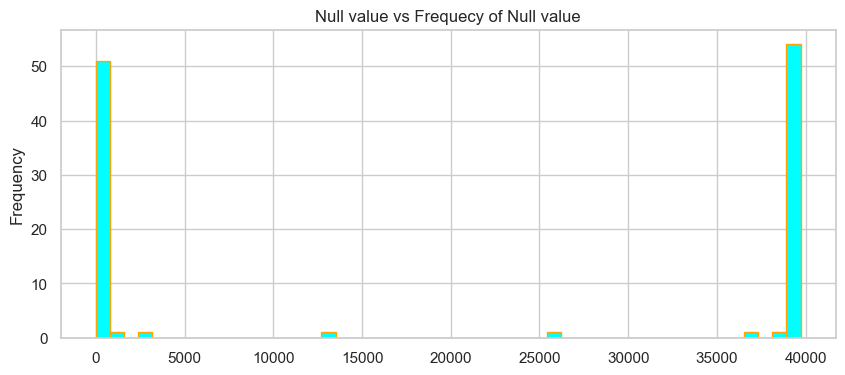

In [131]:
#graph to show the null value count 
col = loan.isnull().sum()
col.plot(kind='hist', bins=50, figsize = (10,4),edgecolor="orange",color="cyan")
plt.title("Null value vs Frequecy of Null value")
plt.show()

In [132]:
#we see there are few columns above 10K mark, Just giving the count how many are above 10000
col.loc[(col.values > 10000) & (col.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [133]:
# There are some Null values as well, drop columns having Null values
loan.drop(columns=list(c[c.values > 10000].index), inplace=True)
loan.shape

(39717, 111)

In [134]:
#Find Max after skipping null values
r = loan.isnull().sum(axis=1) / len(loan.columns)
max(r.values)

0.5585585585585585

In [21]:
# to find out unique and single values 
column_unique = loan.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [135]:
#look for single value and drop 
col1 = column_unique[column_unique.values == 1]
col1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [136]:
#drop values
loan.drop(columns = list(c1.index), inplace=True)
loan.shape

(39717, 102)

In [137]:
#To Know which applications are risky, and get the count
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=del_cols, inplace=True)
loan.shape


(39717, 86)

In [25]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [138]:
#get details like min max count
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,0.0,39020.000000,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,NaN,0.043260,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,NaN,0.204324,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [139]:
#get loan status
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

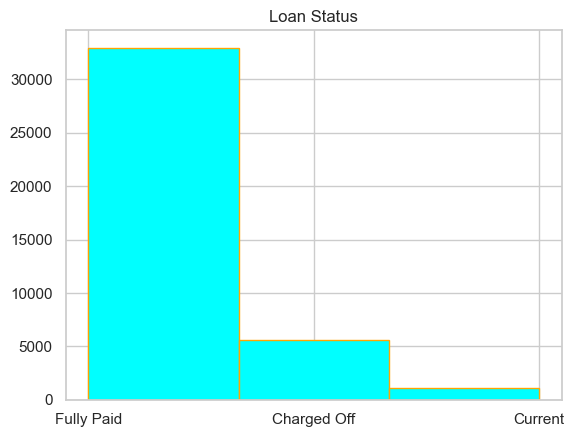

In [140]:
#to show graph of loan status
plt.hist(loan['loan_status'],bins=3,edgecolor="orange",color="cyan")
plt.title("Loan Status")
plt.show()

In [141]:
#dropping current value 
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 86)

In [143]:
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [144]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [145]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

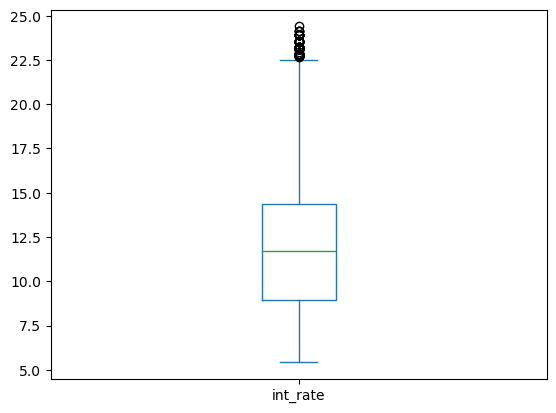

In [33]:
loan['int_rate'].plot.box()
plt.show()

In [146]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [35]:
#get sub_grade column counts
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [147]:
#get first 5 emp_title
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64
(28028,)


In [148]:
#findout the emp_length
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [149]:
loan['emp_length'].isnull().sum()

1033

In [150]:
#get loan columns 
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old

In [151]:
#home_ownership counts
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [152]:
#verification status 
loan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [155]:
#split month and year 
m, y = loan['issue_d'].str.split('-').str
y.value_counts()

KeyError: 'issue_d'

In [153]:
m.value_counts()

Oct    3967
Dec    3951
Nov    3811
Sep    3505
Jan    3331
Aug    3213
Jul    2967
Jun    2863
May    2825
Feb    2783
Mar    2715
Apr    2646
Name: earliest_cr_line, dtype: int64

In [154]:
#add new column like issued_year and issued_month
loan['issue_y'] = pd.to_numeric(y)
loan['issue_m'] = m
loan.drop(columns=['issue_d'], inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_y,issue_m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,85,Jan
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,99,Apr
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1,Nov
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,96,Feb
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4,Nov


In [156]:
#get clount of reason of loan 
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [157]:
len(loan['title'].value_counts())

19297

In [158]:
loan['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [49]:
#drop unique values
loan.drop(columns=['title'], inplace=True)

In [50]:
#state Wise count
loan['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [51]:
#earliest_cr_line count
loan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [52]:
#separate year wise 
m, y = loan['earliest_cr_line'].str.split('-').str
y.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

In [53]:
from datetime import datetime
today = datetime.today()
today.year

2023

In [55]:
#get the exact year as the year format is different in many 
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-22")

89

In [56]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9519.981647
std       2491.854695
min       5232.000000
25%       7850.000000
50%       9069.000000
75%      10681.000000
max      28182.000000
Name: days_from_earliest_cr_line, dtype: float64

In [57]:
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [58]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [59]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 385

In [60]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,issue_y,days_from_earliest_cr_line
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.043479,10.309070,9519.981647
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.204583,0.882658,2491.854695
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,7.000000,5232.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.000000,10.000000,7850.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.000000,11.000000,9069.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.000000,11.000000,10681.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,11.000000,28182.000000


In [61]:
#percentage of loans paid vs charged off
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

In [177]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_bc_limit,total_il_high_credit_limit,issue_y,issue_m,loan_amnt_p,int_rate_p,installment_p,dti_p,annual_inc_p,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,NaN,85,Jan,Lowest (500.0 - 5000.0),Lower (7.9% - 10.99%),Lower (149.92 - 228.71),Highest (19.71 - 29.99),Lowest (4000.0 - 37196.16),0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,99,Apr,Lowest (500.0 - 5000.0),Highest (15.21% - 24.4%),Lowest (15.69 - 149.92),Lowest (0.0 - 6.91),Lowest (4000.0 - 37196.16),1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,NaN,1,Nov,Lowest (500.0 - 5000.0),Highest (15.21% - 24.4%),Lowest (15.69 - 149.92),Lower (6.91 - 11.35),Lowest (4000.0 - 37196.16),0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,96,Feb,Medium (7750.0 - 11200.0),Higher (12.84% - 15.21%),Higher (327.96 - 480.33),Highest (19.71 - 29.99),Lower (37196.16 - 50004.0),0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,NaN,4,Nov,Lowest (500.0 - 5000.0),Lowest (5.42% - 7.9%),Lower (149.92 - 228.71),Lower (6.91 - 11.35),Lowest (4000.0 - 37196.16),0


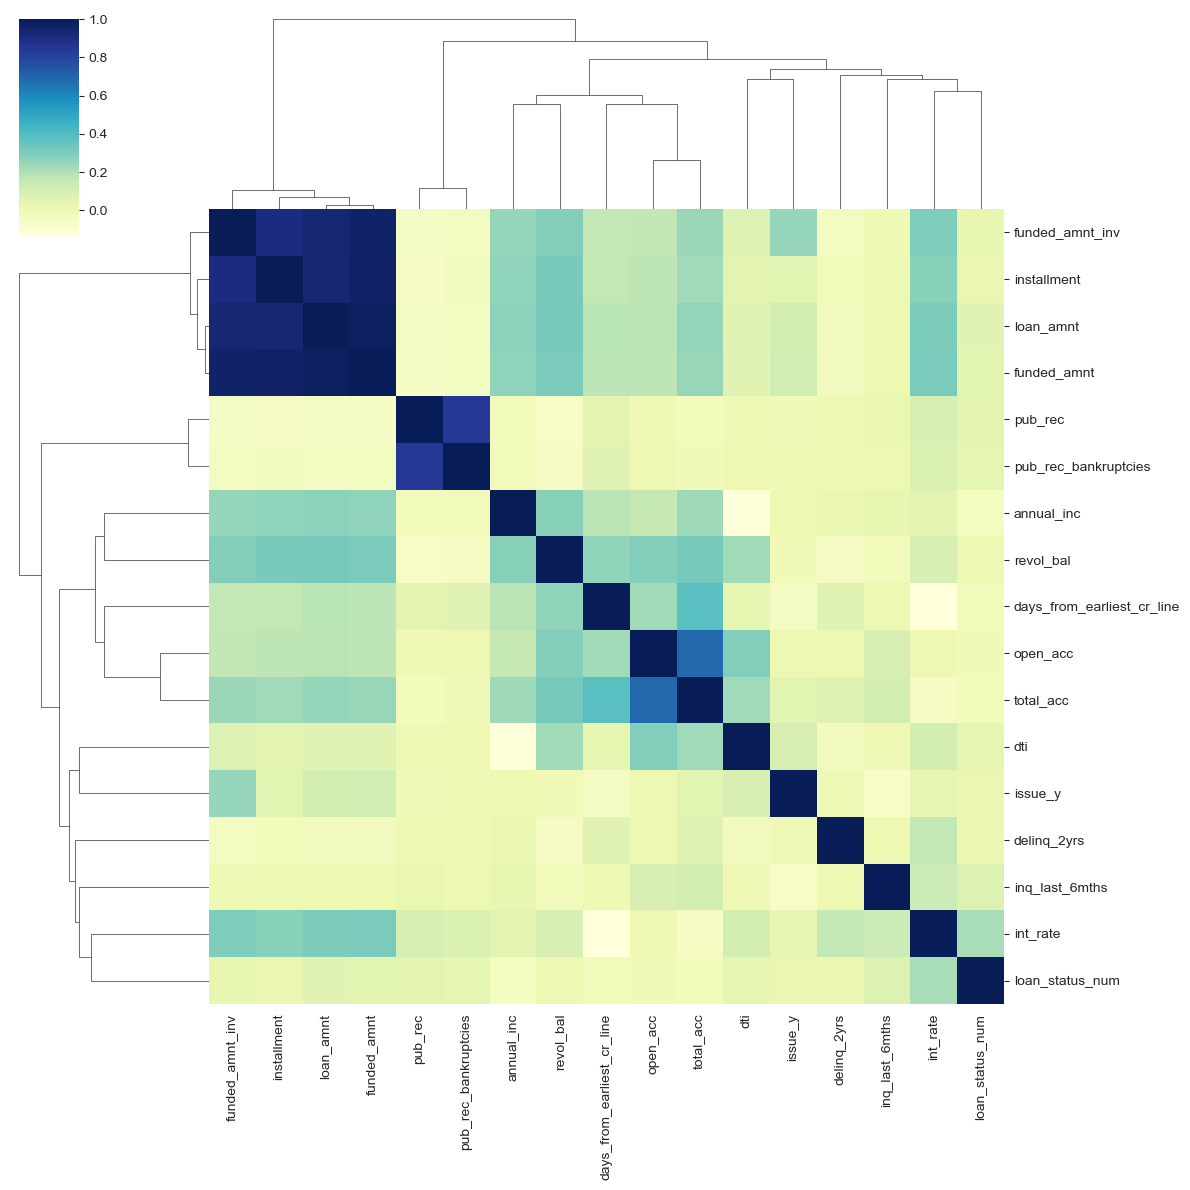

In [64]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

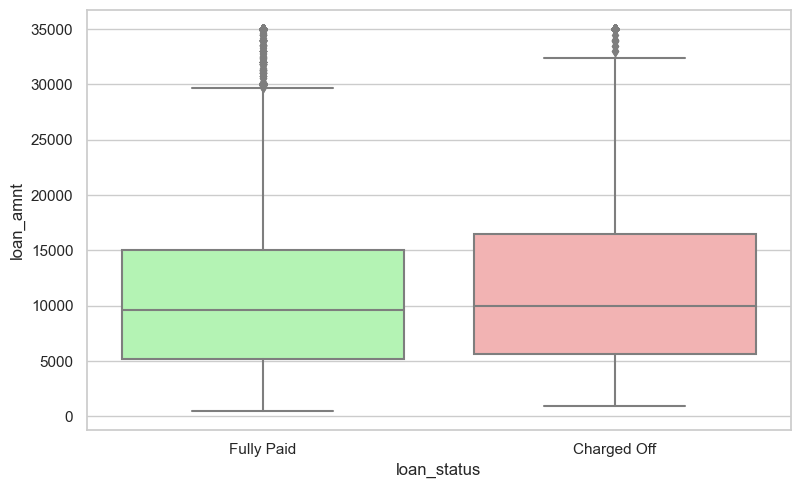

In [65]:
#Loan status vs Numerical continuous
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [66]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

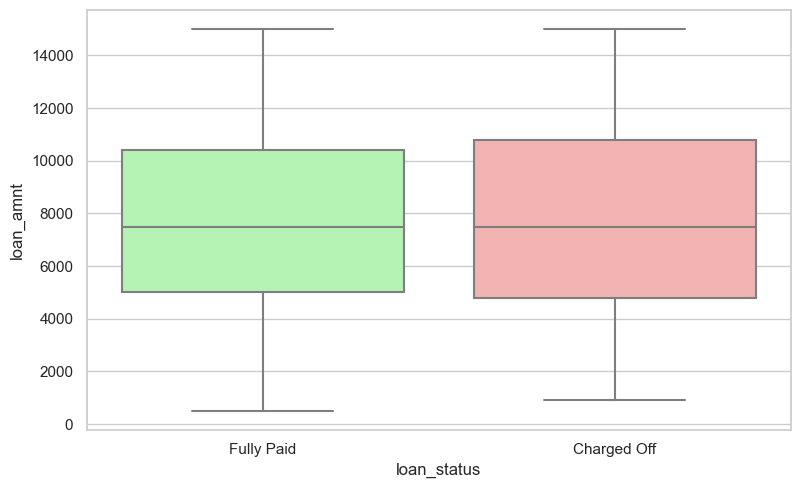

In [67]:
loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [68]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3 years,...,8,0,17813,85.60%,22,0.0,11,Dec,9250,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,...,7,0,32135,90.30%,38,0.0,11,Dec,14637,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2 years,...,8,0,13707,93.90%,31,0.0,11,Dec,7697,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,nyc transit,9 years,...,7,0,5872,57.60%,11,0.0,11,Dec,7090,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,...,12,0,23151,27.40%,26,0.0,11,Dec,15094,0


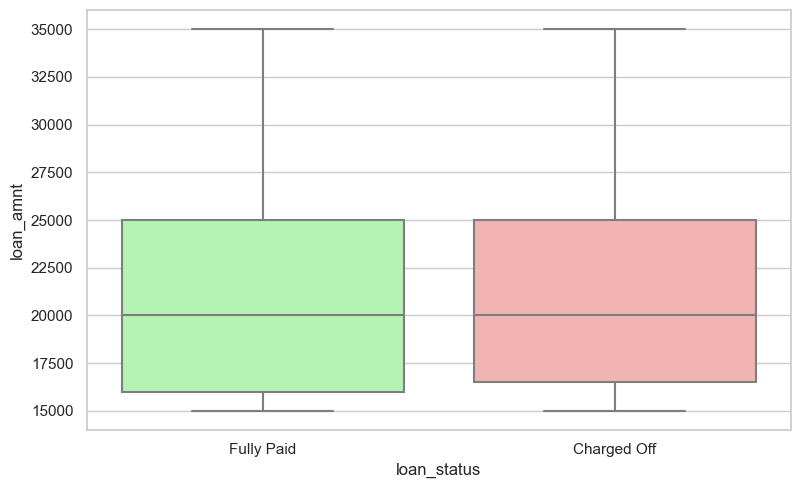

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

In [159]:
def PercentileCut (*, data=loan, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [71]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'days_from_earliest_cr_line', 'loan_status_num'],
      dtype='object')

In [160]:
def Univariate_Categorical (*, data=loan, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

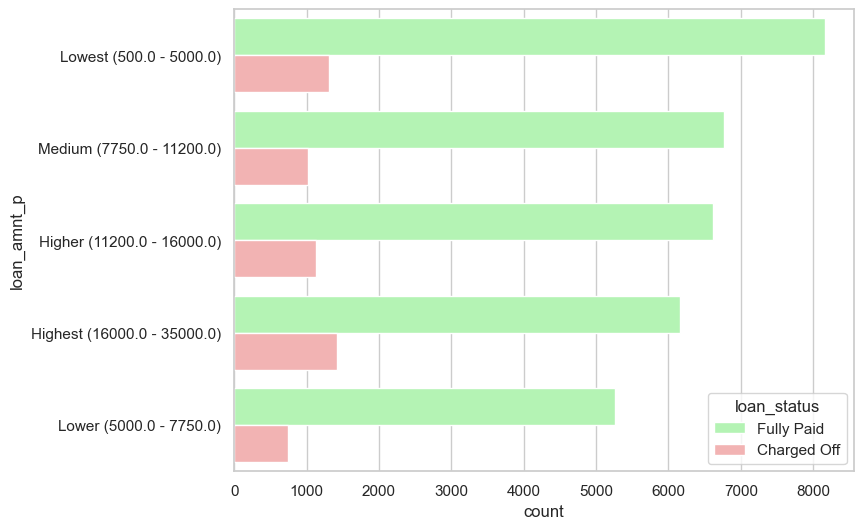

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [161]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

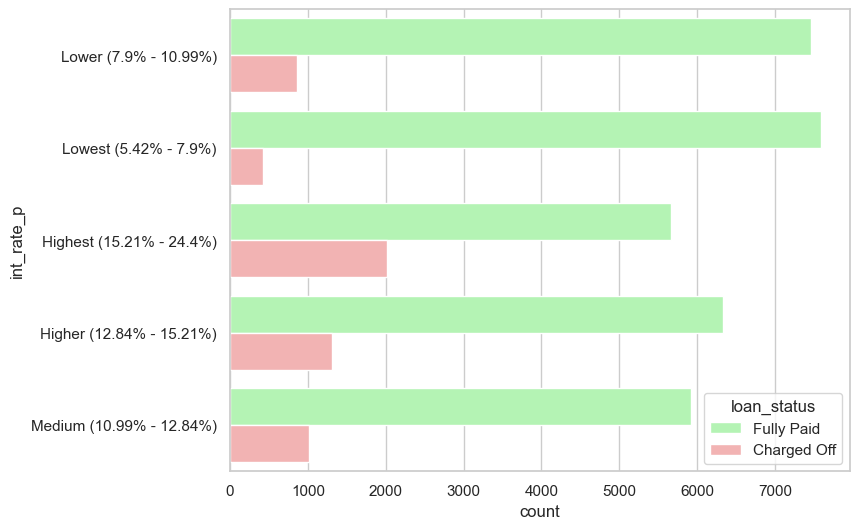

int_rate_p,Charged off %,Record count
Highest (15.21% - 24.4%),0.262150,7675
Higher (12.84% - 15.21%),0.171619,7639
Medium (10.99% - 12.84%),0.146995,6939
Lower (7.9% - 10.99%),0.102876,8311
Lowest (5.42% - 7.9%),0.053538,8013


In [162]:
#loan amount
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

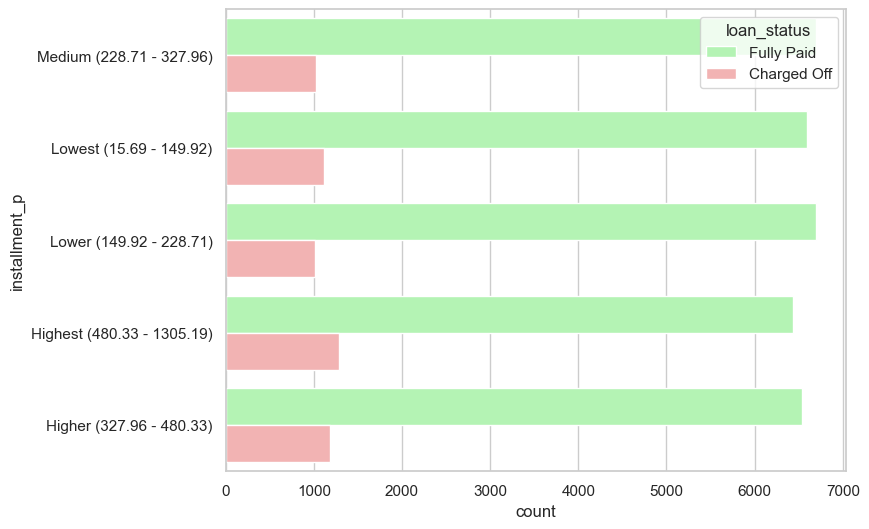

installment_p,Charged off %,Record count
Highest (480.33 - 1305.19),0.166321,7714
Higher (327.96 - 480.33),0.152988,7713
Lowest (15.69 - 149.92),0.145153,7716
Medium (228.71 - 327.96),0.132936,7718
Lower (149.92 - 228.71),0.131934,7716


In [163]:
#Higher the interest rate leads to higher charged off%
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

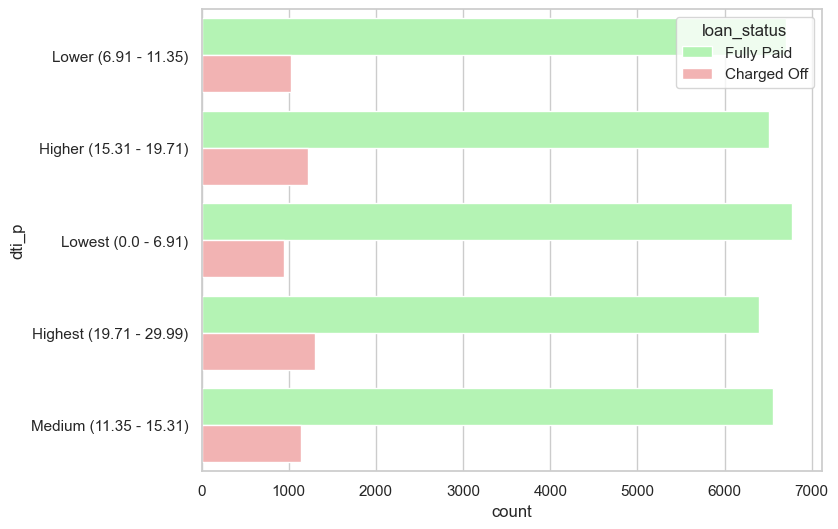

dti_p,Charged off %,Record count
Highest (19.71 - 29.99),0.168853,7699
Higher (15.31 - 19.71),0.157908,7726
Medium (11.35 - 15.31),0.147609,7696
Lower (6.91 - 11.35),0.132627,7736
Lowest (0.0 - 6.91),0.122409,7720


In [164]:
#Find the repayment according to income
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

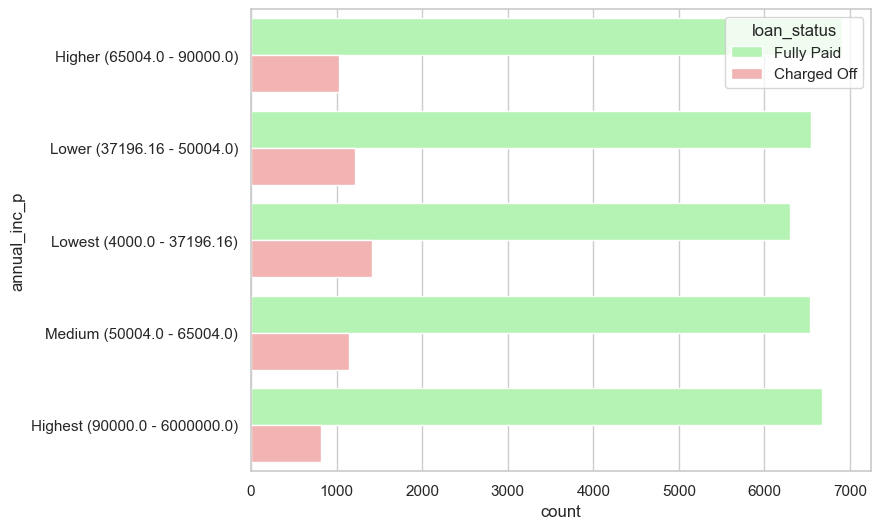

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37196.16),0.183126,7716
Lower (37196.16 - 50004.0),0.156926,7768
Medium (50004.0 - 65004.0),0.149629,7679
Higher (65004.0 - 90000.0),0.129651,7929
Highest (90000.0 - 6000000.0),0.109285,7485


In [172]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

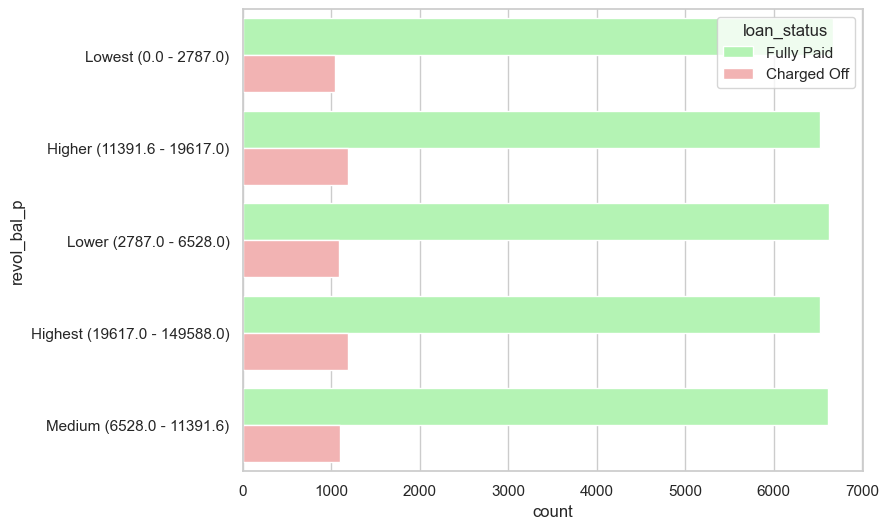

revol_bal_p,Charged off %,Record count
Highest (19617.0 - 149588.0),0.154913,7714
Higher (11391.6 - 19617.0),0.154335,7717
Medium (6528.0 - 11391.6),0.142894,7712
Lower (2787.0 - 6528.0),0.141283,7715
Lowest (0.0 - 2787.0),0.135898,7719


In [77]:
#Findout the higher charged off
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

In [166]:
#As per this we came to conclusion As Higher as the revolving balance, bigger the chance of the loan getting defaulted.


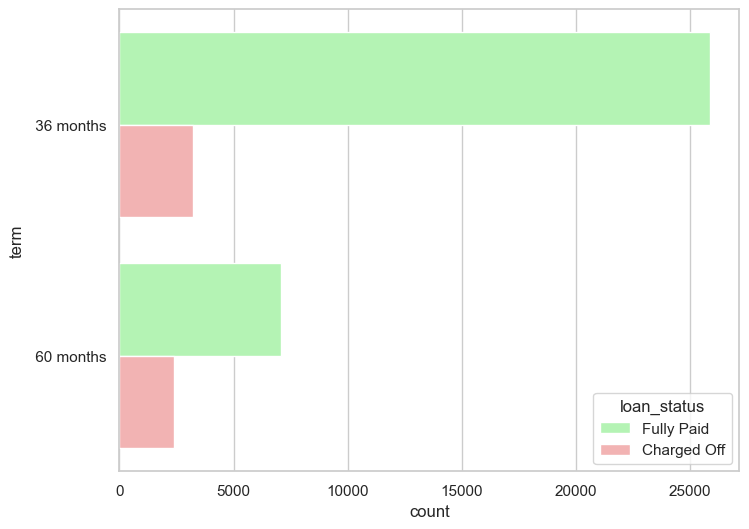

term,Charged off %,Record count
60 months,0.253138,9481
36 months,0.110909,29096


In [167]:
#This data shows that the revolving line utilization rate has a large impact to the default percentage. When this increases, the charged off percentage rises.
Univariate_Categorical(column='term')

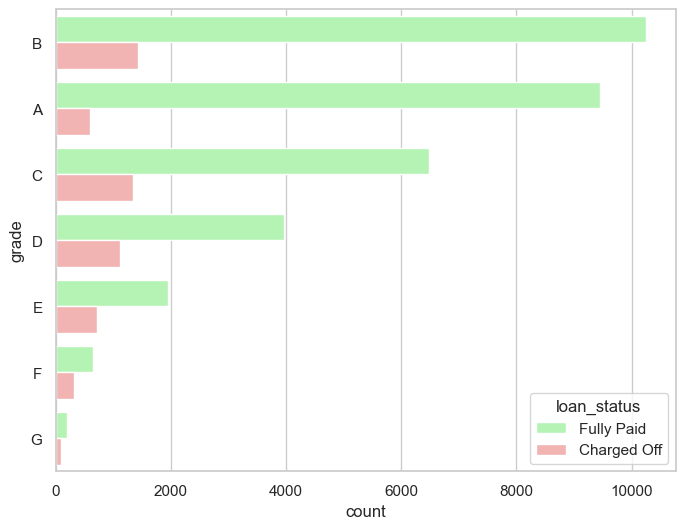

grade,Charged off %,Record count
G,0.337793,299
F,0.326844,976
E,0.268494,2663
D,0.219862,5085
C,0.171943,7834
B,0.122056,11675
A,0.059930,10045


In [168]:
#For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases. Therefore, loan repayment term plays a factor in judging the default rate.
Univariate_Categorical(column='grade')

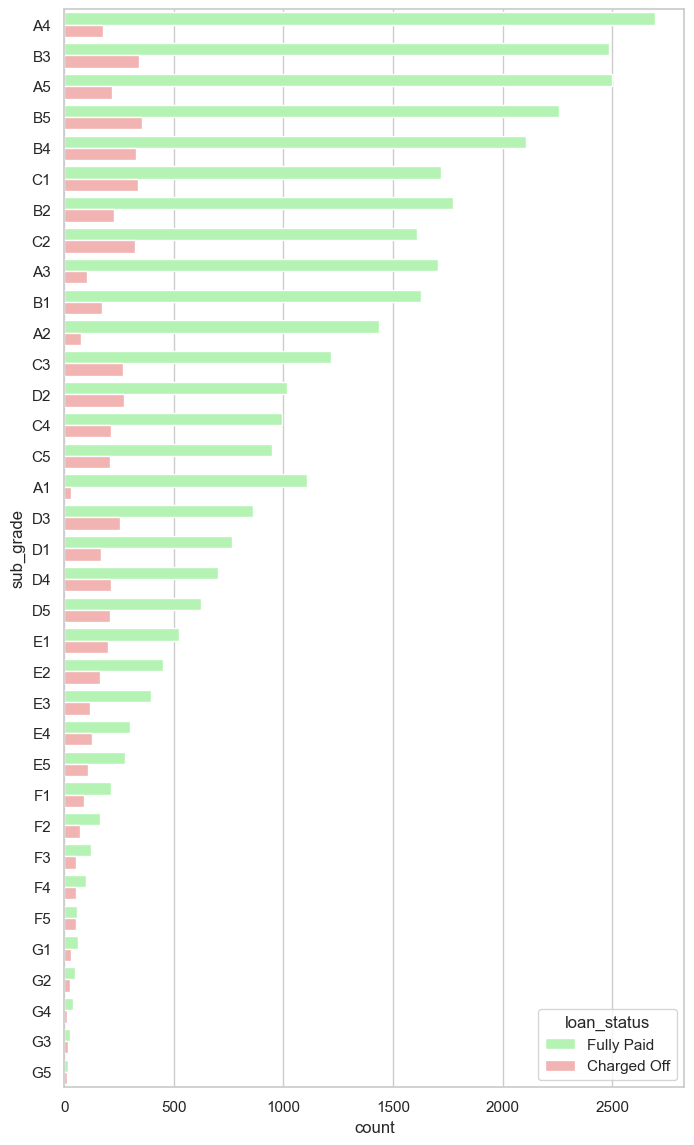

sub_grade,Charged off %,Record count
F5,0.477876,113
G3,0.422222,45
G2,0.363636,77
F4,0.350993,151
G5,0.344828,29
G1,0.329787,94
F2,0.300429,233
F1,0.298361,305
E4,0.297170,424
F3,0.293103,174


In [86]:
#We can clearly see that loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.
Univariate_Categorical(column='sub_grade', figsize=(8,14))

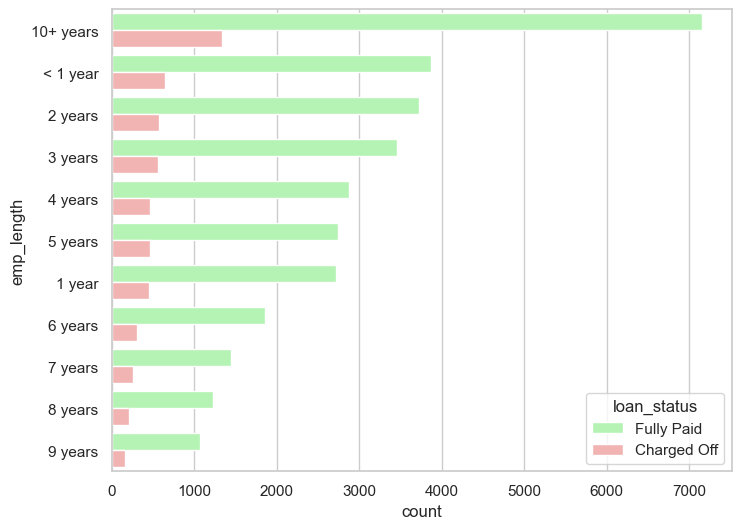

emp_length,Charged off %,Record count
10+ years,0.156810,8488
7 years,0.153711,1711
1 year,0.143894,3169
5 years,0.143394,3194
< 1 year,0.141748,4508
6 years,0.141605,2168
8 years,0.141463,1435
3 years,0.138335,4012
4 years,0.138241,3342
2 years,0.132137,4291


In [87]:
#The above table shows the loan sub-grade versus the default percentage. The G3 and F5 sub categories have above 40% default rate. This field is a clear indicator of the default percent.
Univariate_Categorical(column='emp_length')


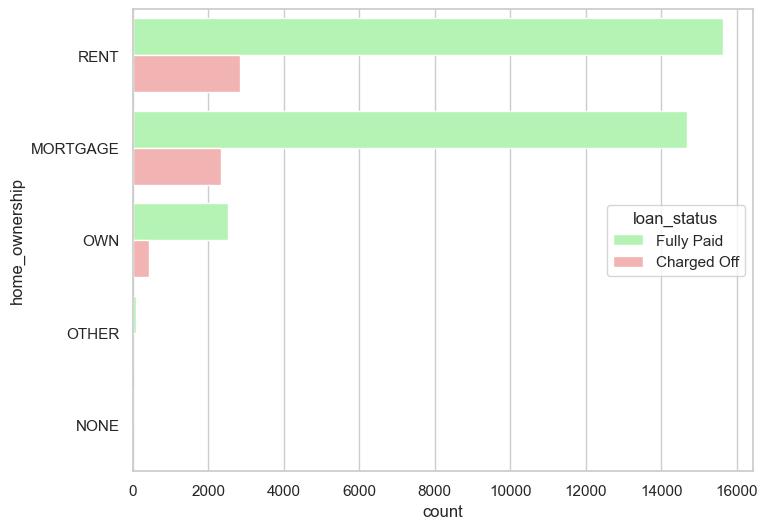

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153626,18480
OWN,0.148908,2975
MORTGAGE,0.136713,17021


In [88]:
#although there is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment
Univariate_Categorical(column='home_ownership')

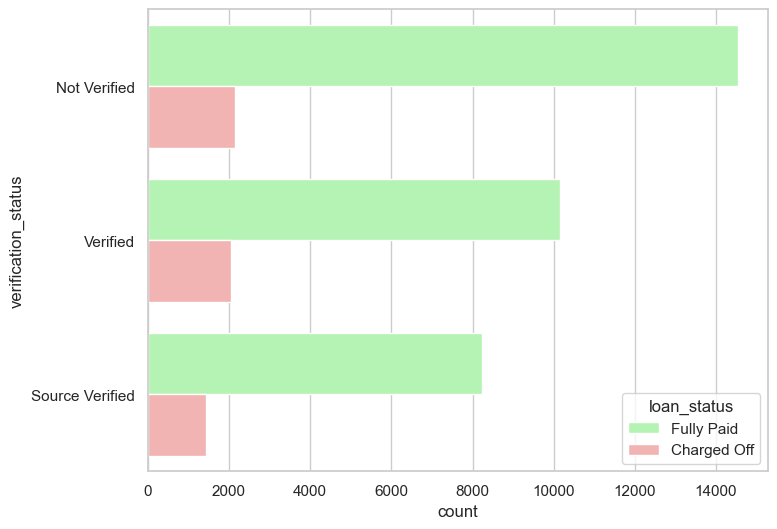

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [89]:
#we have not much info to conclude as it says "OTHER",
Univariate_Categorical(column='verification_status')

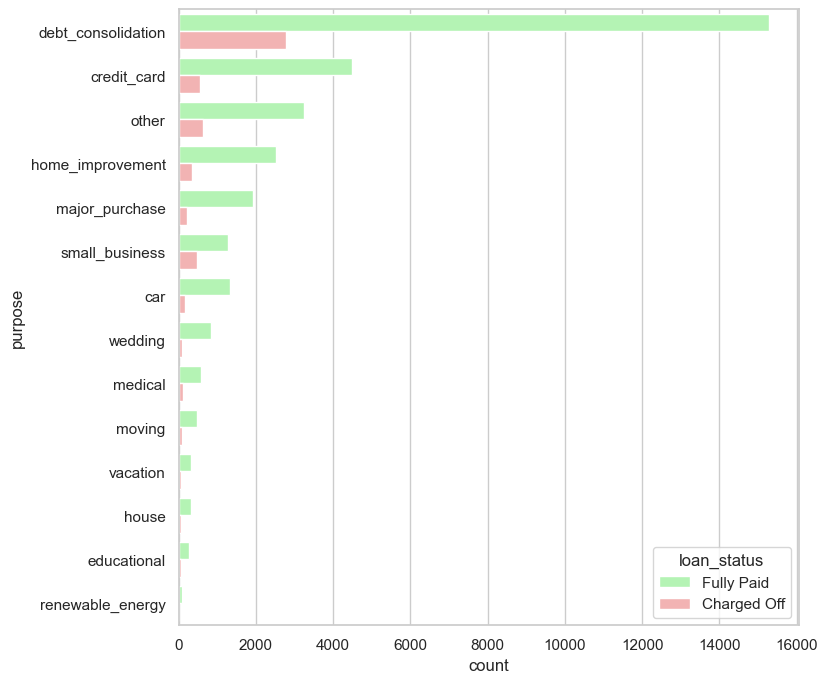

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [90]:
#interestingly verified applicants have more defaulted % which means the verifiaction process is not correct.
Univariate_Categorical(column='purpose', figsize=(8,8))

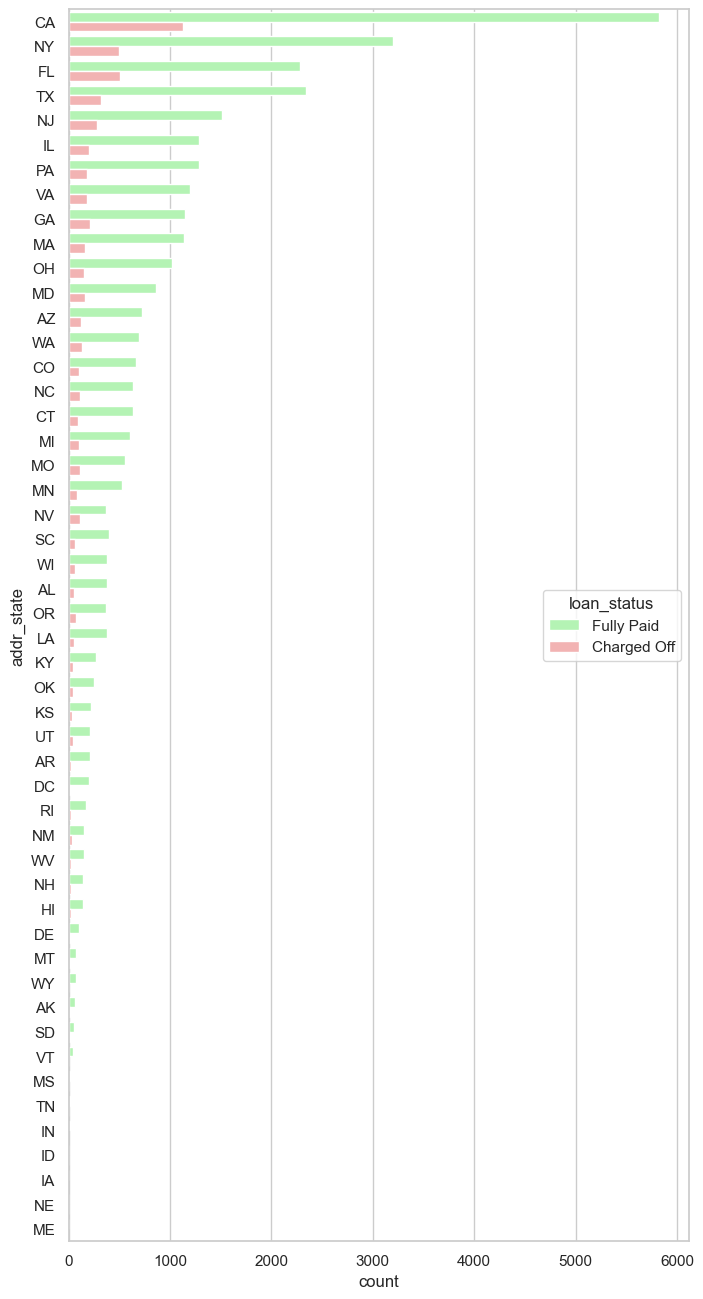

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225470,479
SD,0.193548,62
AK,0.192308,78
FL,0.181230,2781
MO,0.170149,670
HI,0.168675,166
ID,0.166667,6
NM,0.163934,183
OR,0.163218,435


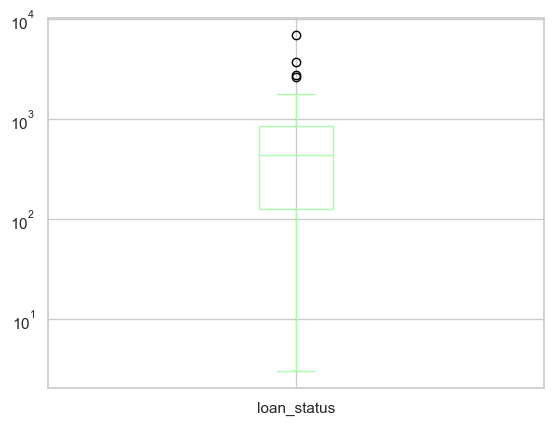

In [91]:
#From the above analysis it is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

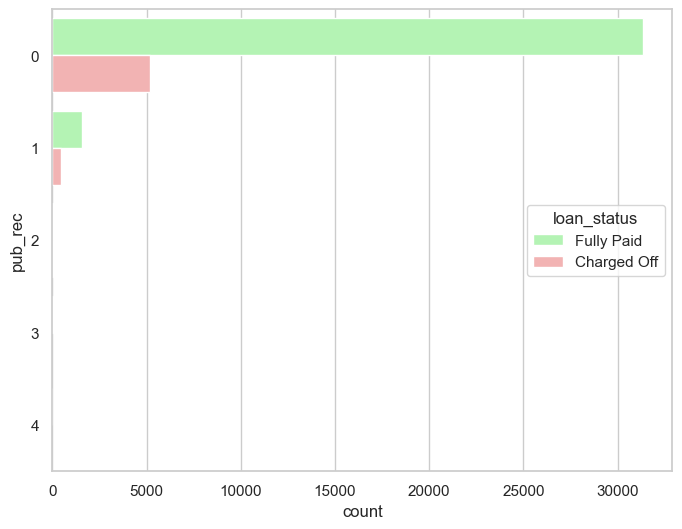

pub_rec,Charged off %,Record count
1,0.227024,2013
2,0.208333,48
0,0.141343,36507


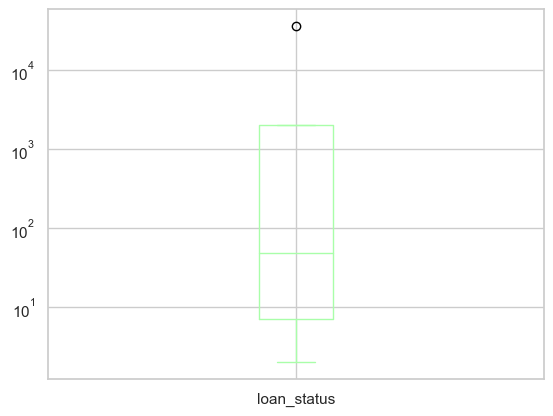

In [92]:
#From the above table we can see that the some of the risky states are NE, NV, SD, AK, FL, MO
Univariate_Categorical(column='pub_rec', box_plot=True)

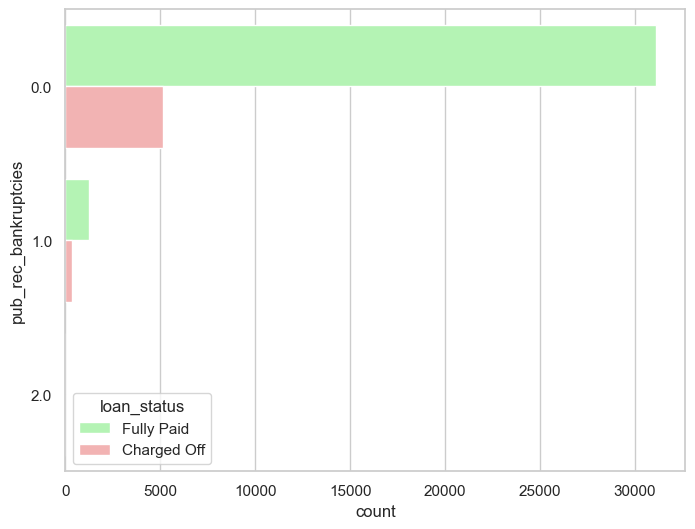

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.223580,1637
0.0,0.141868,36238


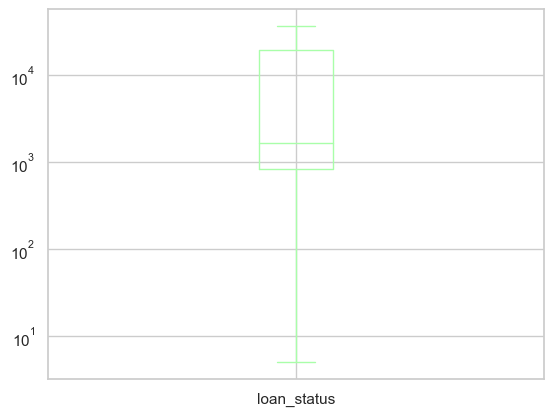

In [93]:
#Above data and graph crealy shows that individuals with non-zero derogatory public records have higher chances of charged off
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

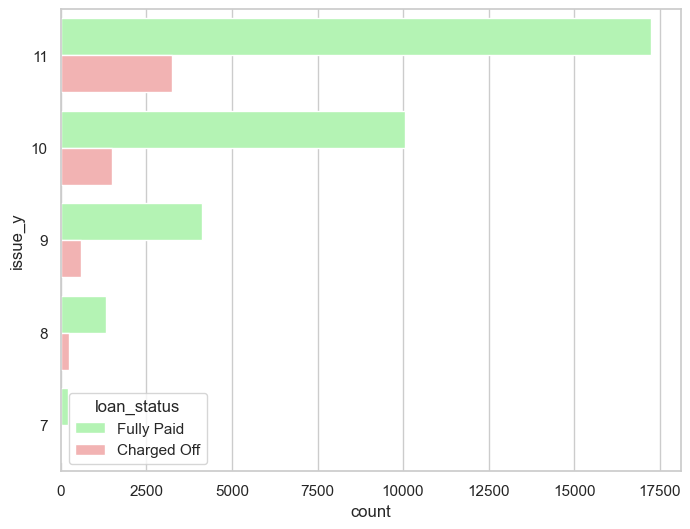

issue_y,Charged off %,Record count
7,0.179283,251
11,0.158705,20516
8,0.158131,1562
10,0.128772,11532
9,0.125954,4716


In [94]:
#Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.
Univariate_Categorical(column='issue_y')

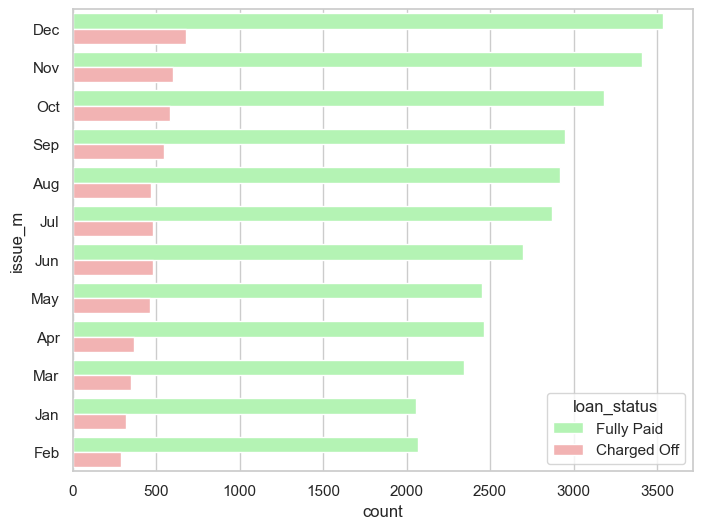

issue_m,Charged off %,Record count
Dec,0.160854,4215
May,0.159644,2919
Sep,0.156375,3498
Oct,0.154214,3761
Jun,0.151887,3180
Nov,0.149276,4006
Jul,0.142942,3351
Aug,0.138135,3388
Jan,0.134931,2379
Apr,0.130696,2831


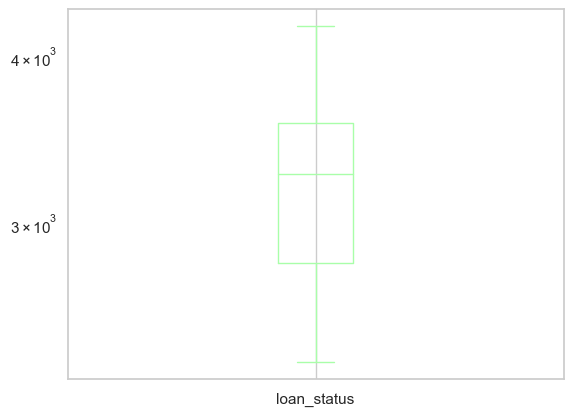

In [95]:
Univariate_Categorical(column='issue_m', box_plot=True)

In [96]:
###Bivariate Analysis

In [173]:
def Bivariate_Analysis (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [174]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

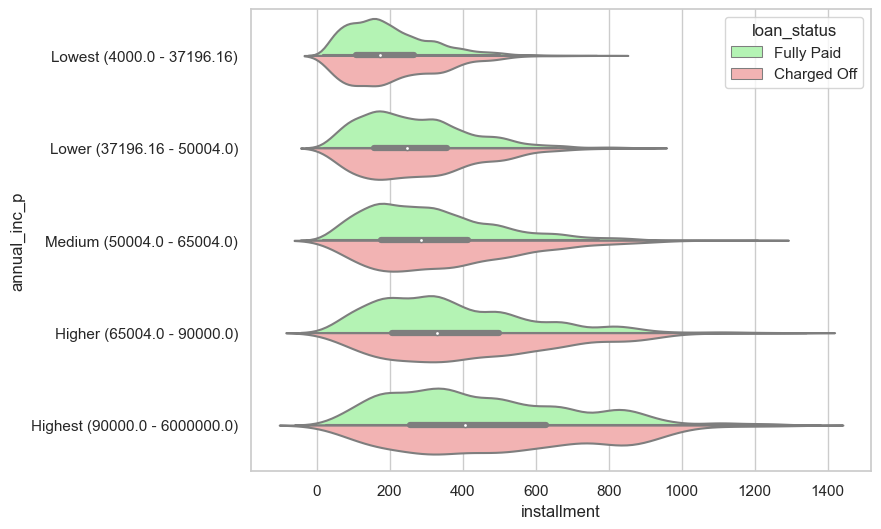

In [175]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

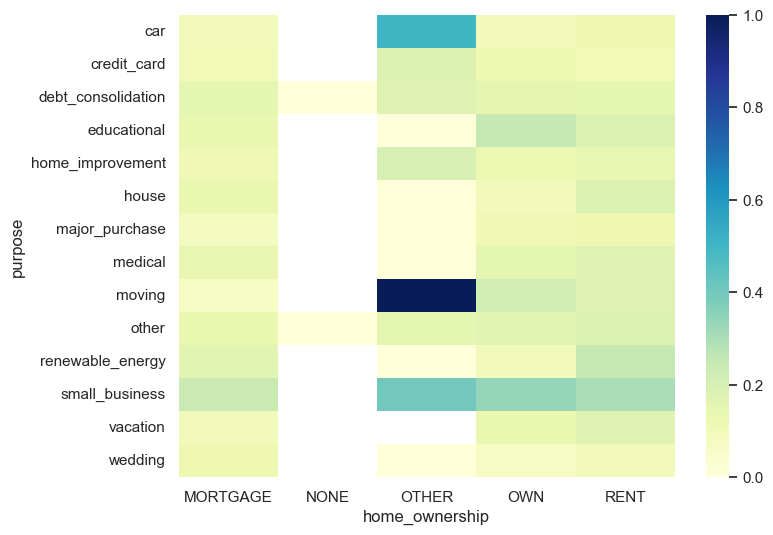

In [100]:
Bivariate_Categorical(x='home_ownership', y='purpose')

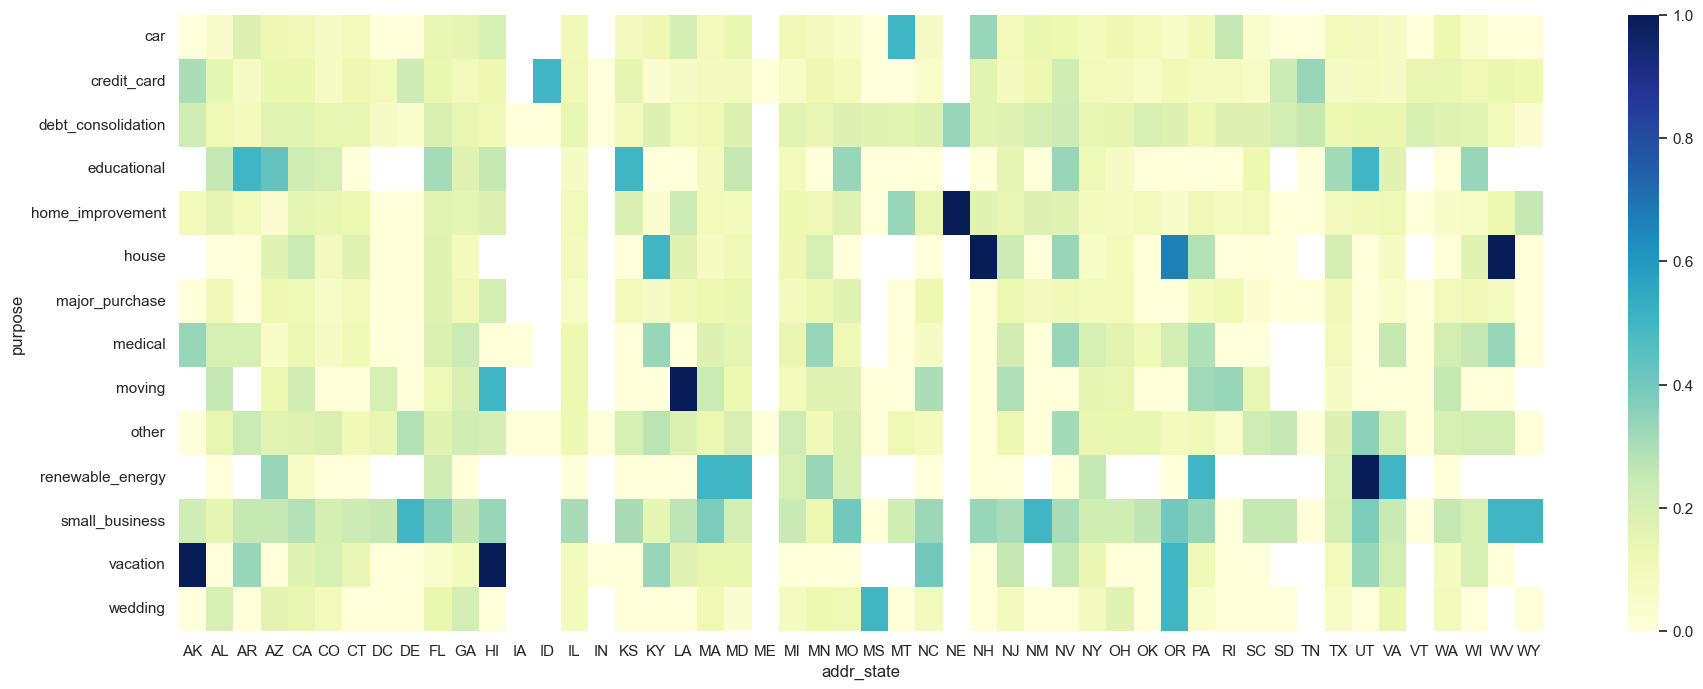

In [101]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))